In [ ]:
!git clone "https://github.com/Varun-SV/colored_text_in_python.git" #A CUSTOM TEXT COLORER

fatal: destination path 'colored_text_in_python' already exists and is not an empty directory.


In [ ]:
#@title Importing all Libraries
from PIL import Image
import numpy as np
import time
from google.colab.patches import cv2_imshow
import os
from random import randint
import cv2
from colored_text_in_python.modules import Color_module as cm #THIS IS A CUSTOME MODULE

#Message to binary in packets of 3


##String to small packets
---
this module will take the message and the key on which it will packetise on the basis of the key provided

In [ ]:
#FUNCTION TO BREAK A MESSAGE INTO PACKETS OF 3 (FOR eg. 'HELLO WORLD' = 'HEL','ELL','LLO','LO ','O W',' WO','WOR','ORL','RLD')
def msg_to_pak(st,key = 3):
  lst = []
  new_lst=[]
  for i in range(0,len(st)):
    lst.append(st[i])
  for i in range(len(lst)-key):
    temp=[]
    for n in range(i,i+key):
      temp.append(st[n])
    new_lst.append(temp)
  # print(lst)                        #UNCOMMENT THESE STATEMENTS TO SEE FUNCTION IN ACTION
  # print(new_lst)                    #UNCOMMENT THESE STATEMENTS TO SEE FUNCTION IN ACTION
  return new_lst

In [ ]:
## FUNCTION TO MAKE THE OPPOSITE OF THE ABOVE FUNCTION (USED FOR DECODING) (FOR eg. 'HEL','ELL','LLO','LO ','O W',' WO','WOR','ORL','RLD' = 'HELLO WORLD')
def pak_to_msg(pk,key = 3):
  st=""
  for i in range(key):
    st+=str(pk[0][i])
  for i in range(1,len(pk)):
    st+=str(pk[i][key-1])
  # print(st)                       #UNCOMMENT THESE STATEMENTS TO SEE FUNCTION IN ACTION
  return st

##Converting the small packets to binary
---
The below module takes the packet from the msg_to_pak and makes it binary .

In [ ]:
## FUNCTION THAT CONVERTS A DECIMAL PACKET INTO A BINARY PACKET
def pack_to_bin_pak(ps, key = 3):
  pk2 = []
  for i in range(len(ps)):
    TYR = []
    for j in range(len(ps[i])):
      TYR.append(int( format( ord( str( ps[i][j] ) ),'b' ) ))
    pk2.append(TYR)
  return pk2

In [ ]:
## FUNCTION THAT CONVERTS A DECIMAL PACKET INTO NORMAL PACKET
def dec_pack_to_pak(pq, key = 3):
  pk2 = []
  for i in range(len(pq)):
    TRE = []
    for j in range(len(pq[i])):
      # pk2[i][j] = chr( int( str(pq[i][j]),2) )
      TRE.append(chr( int( str(pq[i][j])) ))
    pk2.append(TRE)
  return pk2

##XOR the binary packets with the current pixel value

In [ ]:
## FUNCTION THAT UPDATES THE LARGER LIST WITH THE SMALLER LIST AT THEIR RESPECTED VALUES
def update_list(small_list,big_list):
  for i in range(len(small_list)):
    big_list[i] = small_list[i]
  return big_list

In [ ]:
## FUNCTIONS THAT MIXES THE DATA/PACKET OF DATA WITH THE IMAGE PIXEL DATA
def xor_to(pixels,datas):
  if len(datas)> len(pixels):
    raise Exception("Please for now input less amount of data!!!")
  else:
    new_pix_val = []
    for i in range(len(datas)):
      TTT= []
      for j in range(len(datas[i])):
        TTT.append(datas[i][j]^pixels[i][j])
      new_pix_val.append(TTT)
    return new_pix_val

In [ ]:
## FUNCTION TO CONVERT BINARY PACKETS TO DECIMAL PACKETS
def bin_pack_to_dec_pak(pd, key = 3):
  pk2 = pd
  for i in range(len(pd)):
    for j in range(len(pd[i])):
      pk2[i][j] = ( int( str(pd[i][j]),2) )
  return pk2

In [ ]:
## FUNCTION TO CONVERT LIST INTO TUPLES (FOR CREATION OF THE IMAGE)
def list_to_tuple(two_d_list):
  for i in range(len(two_d_list)):
    two_d_list[i] = tuple(two_d_list[i])
  return two_d_list

In [ ]:
## FUNCTION TO CREATE THE IMAGE AND SAVE IT ALSO...
def create_image(pixels, org_img,org_arr):
  x_pix = org_img.size[0]
  y_pix = org_img.size[1]
  x_c = x_pix or len(pixels)
  i=0
  pix_arr=[]
  while (i<=len(pixels)):
    t = []
    for j in range(i,i+x_c):
      if j< len(pixels):
        t.append(pixels[j])
      else:
        pass
    pix_arr.append(t)
    i+=x_c

  for i in range(len(pix_arr)):
    for j in range(len(pix_arr[i])):
      for k in range(len(pix_arr[i][j])):
        org_arr[i][j][k] = pix_arr[i][j][k]

  new_img = Image.fromarray(org_arr)
  print("Saving",end='')
  for i in range(5):
    time.sleep(randint(1,3))
    print('.'*np.random.randint(3,7),end='')
  print()
  new_img.save("Encoded.png")
  return new_img

In [ ]:
## FUNCTON TO GENERATE A RANDOM IMAGE!!!
def random_img(output, width, height):

    array = np.random.randint(0,255, (height,width,3))  

    array = np.array(array, dtype=np.uint8)
    # print(array)
    img = Image.fromarray(array)
    img.save(output)
    return array

In [ ]:
## FUNCTION THAT DO THE ACTUAL ENCODING OF TEXT INTO THE IMAGE BY CALLING OTHER FUNCTIONS!!!
def enc (image_name, msg,b):
  im = Image.open(image_name)
  q = list(im.getdata())
  Q = []
  for i in range(len(q)):
    Q.append(list(q[i]))
  BB = bin_pack_to_dec_pak(b)
  XOR_res = xor_to(Q,BB)
  return im,Q,BB,XOR_res


In [ ]:
## FUNCTION THAT CREATES THE RANDOM IMAGE AND ENCODE IT WITH THE TEXT PROVIDED
def steganography(encrypted_text):
  random_pixel_info = random_img('random.png',1000,1000)
  b = pack_to_bin_pak(msg_to_pak(encrypted_text))
  imgs,Q,BB,new_Q = enc(str('random.png'),encrypted_text,b)
  # random_pixel_info = np.array(cv2.imread('black.jpg'))
  updated_Q = update_list(new_Q,Q)
  N_im = create_image(updated_Q,imgs,random_pixel_info)
  return imgs,N_im

##For Decoding
---
Creating all the functions for the decoding procedures

In [ ]:
## FUNCTION THAT IS REQUIRED TO CONVERT THE IMAGE TO LIST
def image_to_list(images):
  lt_im = list(images.getdata())
  return lt_im

In [ ]:
## SINCE X^X =0 THAT MEANS SIMILAR PIXELS WHEN XORED! WILL BECOME 0 HENCE REMOVAL IS NEEDED!
def remove_empty_boxex(tuplst):
  yyy = []
  for i in range(len(tuplst)):
    if tuplst[i] == [0,0,0]:
      break
    else:
      yyy.append(tuplst[i])
      # print(yyy)                    #UNCOMMENT THESE STATEMENTS TO SEE FUNCTION IN ACTION
  return yyy

In [ ]:
## DECODING THE MESSAGE FROM THE ENCODED AND RANDOM IMAGE!!!
def decoding(org_im,enc_im):
  org_list = image_to_list(org_im)
  enc_list = image_to_list(enc_im)
  xor_result = xor_to(org_list,enc_list)
  result = remove_empty_boxex(xor_result)
  result_to_chr = dec_pack_to_pak(result)
  decoded_text = pak_to_msg(result_to_chr)
  # print(decoded_text)              #UNCOMMENT THESE STATEMENTS TO SEE FUNCTION IN ACTION
  return decoded_text

In [ ]:
## FUNCTIONS TO CALL THE DEFAULT STATEMENT WHEN THERE IS NO INFORMATION ENTERED!
def encode_default():
  a,b = steganography("You did not enter any information!!!")
  return a,b

In [ ]:
## RANDOM TEXT DECORATION FOR FUM
def text_coloration(text):
  a,b,c,d = np.random.randint(1,35),np.random.randint(1,35),np.random.randint(1,35),np.random.randint(1,35)
  new_text = cm.text_return(text,[a,b,c,d],' ')  
  return new_text

In [ ]:
## THE MAIN FUNCTION
def main():
  print("Welcome to the steganography!!!")
  choice=0
  # while(choice<3):
  choice = int(input("1.Encoding text into random image!!!\n2.Decoding from random image\nEnter your choice : "))
  if choice == 1:
    text = input("Enter your Text : ")
    text+=' '
    text = text_coloration(text)
    print("The text to be inserted into the image is : ",str(text))
    print("Encoding the text into the image : ")
    
    
    org,enc = steganography(text)
    print("The original Image is : ")
    img_arr = np.array(org.convert("RGB"))
    cv2_imshow(img_arr)
    print("The encoded Image is : ")
    img_arr = np.array(enc.convert("RGB"))
    cv2_imshow(img_arr)
    org.close()
    enc.close()

  elif choice == 2:
    print("Decoding the image!!!")
    try:
      org = Image.open('random.png')
      enc = Image.open('Encoded.png')
      decoded_txt = decoding(org,enc)
    except:
      org,enc = encode_default()
      decoded_txt = decoding(org,enc)
    org.close()
    enc.close()
    print(decoded_txt)
    del decoded_txt
  else:
    exit()

Welcome to the steganography!!!
The text to be inserted into the image is :  Steganography on a random image!  
Encoding the text into the image : 
Saving.......................
The original Image is : 


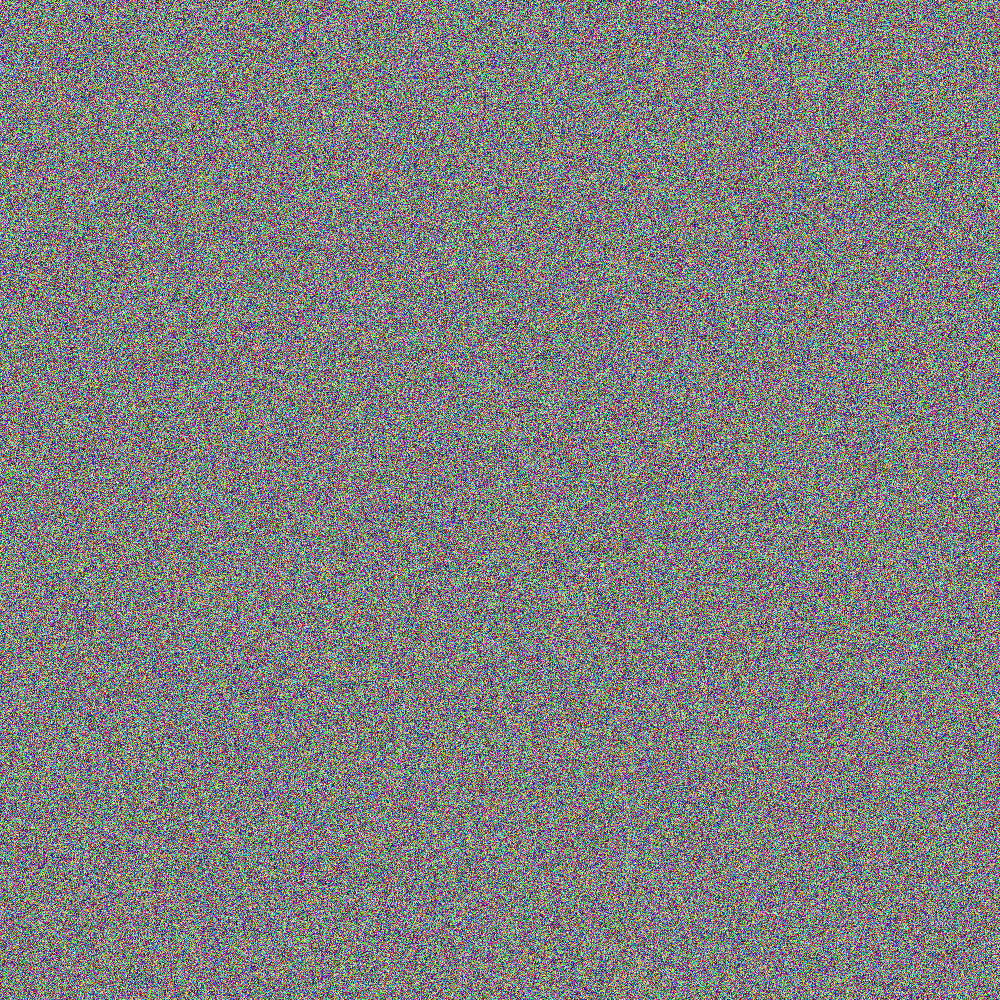

The encoded Image is : 


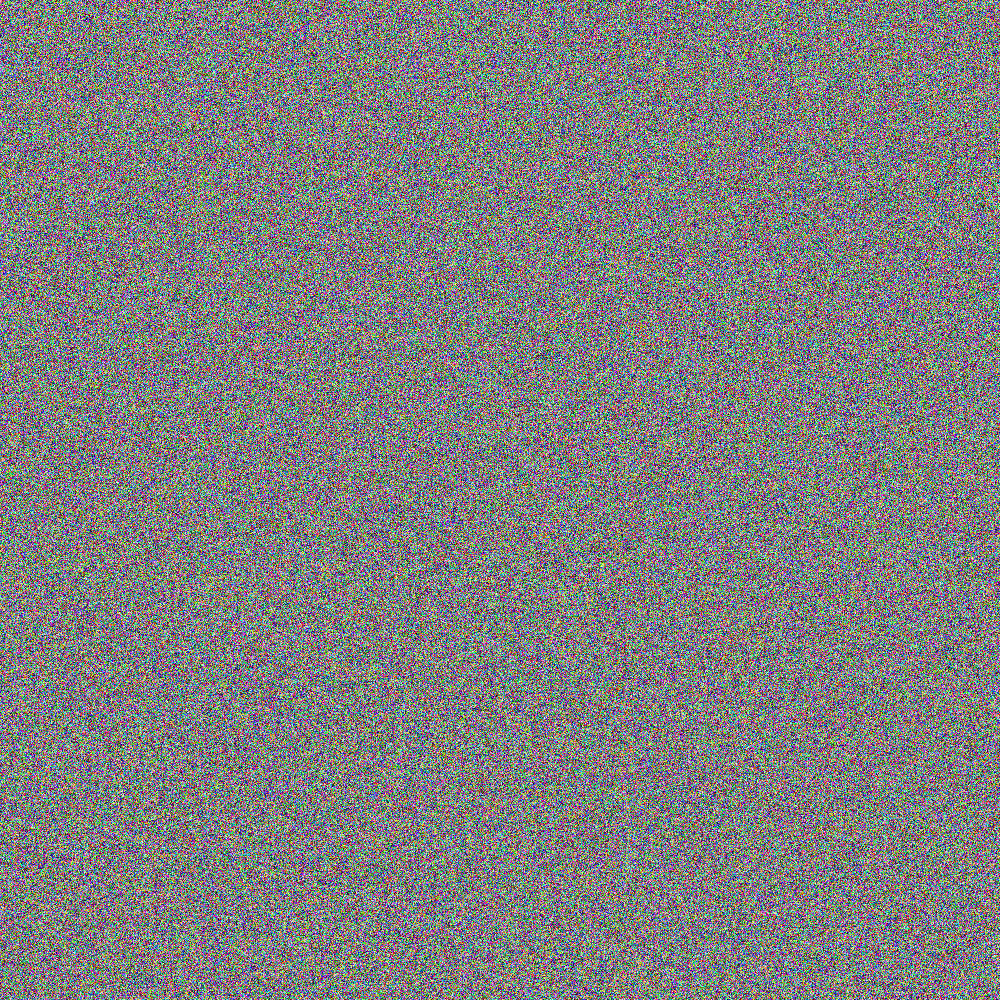

In [ ]:
## CALLING UP THE MAIN FUNCTION!
main()

In [23]:
## CALLING MAIN FUNCTION AGAIN TO SEE DECODING IN ACTION
main()

Welcome to the steganography!!!
1.Encoding text into random image!!!
2.Decoding from random image
Enter your choice : 2
Decoding the image!!!
Steganography on a random image! 
